<a href="https://colab.research.google.com/github/lordfiftyfive/Seattle-Tensorflow/blob/master/InstructionalptI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

If you do NOT have the following libraries installed on your local machine then you will want to:
 1. install anaconda navigator and install the spyder enviroment withen anaconda navigator 
 2. open up a terminal withen anaconda navigator and use conda install (name of library)



 
 

In [ ]:
!pip install quandl


  Created wheel for inflection: filename=inflection-0.3.1-cp36-none-any.whl size=6076 sha256=5acd675758d0c135d4489884d8a94d4c7e34029acdab1782fbdd9439267dbe8c
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection


In [ ]:
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
#import quandl
import pandas as pd

    First we are going to want to import our data here we are going to show how
     to import using one of the most common data format which is the csv file 

In [ ]:
from google.colab import files
files.upload()

Saving 930-data-export.csv to 930-data-export.csv


{'930-data-export.csv': b'\xef\xbb\xbf"Region Code","Timestamp (Hour Ending)","Demand (MWh)","Demand Forecast (MWh)","Net Generation (MWh)","Total Interchange (MWh)"\nUS48,"1/13/2020 12 a.m. EST",412290,407010,392570,2977\nUS48,"1/13/2020 1 a.m. EST",396187,389484,384466,3557\nUS48,"1/13/2020 2 a.m. EST",383358,378106,373763,3755\nUS48,"1/13/2020 3 a.m. EST",376657,371685,368427,3617\nUS48,"1/13/2020 4 a.m. EST",373911,371433,365626,3968\nUS48,"1/13/2020 5 a.m. EST",377435,379238,372388,3885\nUS48,"1/13/2020 6 a.m. EST",391321,398288,390232,3724\nUS48,"1/13/2020 7 a.m. EST",420939,426194,419251,4251\nUS48,"1/13/2020 8 a.m. EST",451411,449840,445065,4899\nUS48,"1/13/2020 9 a.m. EST",466590,462151,458984,3777\nUS48,"1/13/2020 10 a.m. EST",474128,466698,463784,2587\nUS48,"1/13/2020 11 a.m. EST",476935,467473,465528,2413\nUS48,"1/13/2020 12 p.m. EST",473527,463802,464555,3258\nUS48,"1/13/2020 1 p.m. EST",469042,458334,459451,3658\nUS48,"1/13/2020 2 p.m. EST",463807,454026,454014,3540\nUS48

In [ ]:
 electricity = pd.read_csv('930-data-export.csv')
 print(electricity)

    Region Code  ... Total Interchange (MWh)
0          US48  ...                  2977.0
1          US48  ...                  3557.0
2          US48  ...                  3755.0
3          US48  ...                  3617.0
4          US48  ...                  3968.0
..          ...  ...                     ...
188        US48  ...                     NaN
189        US48  ...                     NaN
190        US48  ...                     NaN
191        US48  ...                     NaN
192        US48  ...                     NaN

[193 rows x 6 columns]


https://www.eia.gov/beta/electricity/gridmonitor/dashboard/electric_overview/US48/US48?src=email

In [ ]:

electricity= pd.DataFrame(electricity)
#print(electricity)

#Data_to_predict = quandl.get("FRBP/GDPPLUS_042619",  collapse="quarterly")
#datafive = quandl.get("FRED/PCETRIM1M158SFRBDAL",  collapse="quarterly", start_date="1977-02-01",end_date="2016-03-31")#quandl.get("FRED/VALEXPUSM052N", authtoken="DNMZo2iRzVENxpxqHBKF", transform="rdiff", collapse="quarterly", start_date="1960-09-30")#quandl.get("WWDI/USA_NE_GDI_TOTL_CD", authtoken="DNMZo2iRzVENxpxqHBKF", start_date="1970-12-31")
#Data_To_predict = Data_to_predict.values

#the below column reduces the dimension of the data set by 1. We need to do this sometimes in order to put it into a pandas dataframe which we can easily manipulate

#datafive= pd.DataFrame(datafive)

#plt.plot(datafive)
#print(datafive)

x = electricity['Demand (MWh)']
x = x.dropna()
x = np.array(x)
Scalar = MinMaxScaler(feature_range=(0,1))
x = x.reshape(-1, 1)
x = Scalar.fit_transform(x)

#print(x)
x = pd.DataFrame(x)
X = x.head(181)
y = x.tail(181)
#y = x.shift(2)
#electricity = electricity['Total Interchange (MWh)']
#print(electricity)
print(X)
print(y)

            0
0    0.252749
1    0.146701
2    0.062214
3    0.018084
4    0.000000
..        ...
176  0.863526
177  0.962837
178  1.000000
179  0.981955
180  0.937522

[181 rows x 1 columns]
            0
1    0.146701
2    0.062214
3    0.018084
4    0.000000
5    0.023208
..        ...
177  0.962837
178  1.000000
179  0.981955
180  0.937522
181  0.874083

[181 rows x 1 columns]


[[0.64537445]
 [0.6222467 ]
 [0.47907489]
 [0.54515419]
 [0.61123348]
 [0.64537445]
 [0.71696035]
 [0.62665198]
 [0.66079295]
 [0.70484581]
 [0.86894273]
 [0.8314978 ]
 [0.97907489]
 [0.91519824]
 [1.        ]
 [0.83259912]
 [0.73348018]
 [0.58810573]
 [0.74669604]
 [0.48898678]
 [0.49779736]
 [0.54405286]
 [0.27643172]
 [0.26321586]
 [0.18832599]
 [0.30837004]
 [0.39757709]
 [0.20594714]
 [0.38325991]
 [0.31828194]
 [0.3777533 ]
 [0.35132159]
 [0.37885463]
 [0.39757709]
 [0.32709251]
 [0.36123348]
 [0.12555066]
 [0.37334802]
 [0.34911894]
 [0.2753304 ]
 [0.37555066]
 [0.29515419]
 [0.31277533]
 [0.14647577]
 [0.35462555]
 [0.43281938]
 [0.52312775]
 [0.33590308]
 [0.36784141]
 [0.28193833]
 [0.31497797]
 [0.3623348 ]
 [0.53744493]
 [0.46475771]
 [0.30396476]
 [0.30726872]
 [0.15198238]
 [0.17070485]
 [0.28634361]
 [0.34581498]
 [0.26651982]
 [0.17290749]
 [0.10022026]
 [0.20704846]
 [0.18502203]
 [0.12555066]
 [0.16079295]
 [0.17180617]
 [0.26101322]
 [0.21475771]
 [0.1277533 ]
 [0.12

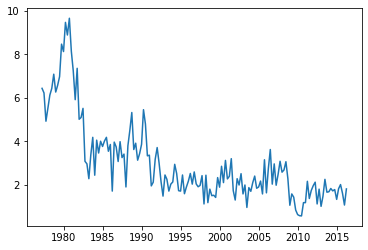

In [ ]:
#Standardize the data

#note on minmaxScalar vs standard scalar using standard scalar is generally inadvisable because of the fact that standard scalar tries to force the data to conform to a standard normal distribution. if the data does not conform to a
#standard normal distribution this can end up distorting the data. 


#b = Scalar.fit_transform()

#b = np.log10(b)


#plt.plot(datafive)
#print(b)

In [ ]:
#filling and eliminating missing data filling and eliminating missing data
#I think this one is about dropping the time index column from the data
from sklearn.impute import SimpleImputer
from scipy.stats.mstats import winsorize
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

final_data = imp.fit_transform(datafive)
#print(a)
#datasix = datasix.drop(datasix.index[0])
#Data_to_predict.values
#datasix = datasix.dropna()
#datafive = datafive.fillna(0)
#unfortunately dropna() and fillna(0) are not very good solutions what if there were a better way?
pca = PCA()# n_components=2 are the components in the dataset which we want to keep which have the greatest amount of correlation
final_data = pca.fit_transform(final_data)

#winsorization is for getting rid of outlier values in the data 
final_data = 	winsorize(final_data)


final_data = pd.DataFrame(final_data)

#this is basically selecting the first 224 values starting from the most initial value
final_data_sub = final_data[224::]

NameError: ignored

In [ ]:
#the above is generally not needed however because tensorflow allows you to split it during the fitting phase and once can simply manually slice
#the arrays 
#model.fit(X,Y,epochs=700, verbose=1,validation_split=0.2)

final_data = np.squeeze(final_data)
plt.plot(final_data)
#if enough time reamains go into various data visualization such as data decomposition, graphing and confidence intervals sns library. 

NameError: ignored

Part two starts from here 

In [ ]:
!pip install tensorflow==2.1
#2.0.0-beta1
#!pip install tensorflow==2.0.0rc0
#!pip install tensorflow-probability
#!pip install gaussian_processes
#!pip install quandl
#!pip install rpy2
#!pip install bootstrapped
!pip install hurst
#!pip install dwave-hybrid
#!pip install dimod
#!import networkx as nx 
#!pip install dwave-system

     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 51kB 4.5MB/s 
     |████████████████████████████████| 3.9MB 37.0MB/s 
     |████████████████████████████████| 450kB 35.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=ea91f65ad42234de2cae5b5971d43f86e3433686771d4a8cffd0139eea8045fb
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tens

     |████████████████████████████████| 92kB 3.3MB/s 
     |████████████████████████████████| 4.7MB 6.2MB/s 
     |████████████████████████████████| 798kB 43.3MB/s 
     |████████████████████████████████| 399kB 44.7MB/s 
     |████████████████████████████████| 3.3MB 41.0MB/s 
     |████████████████████████████████| 92kB 9.4MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
     |████████████████████████████████| 92kB 9.6MB/s 
/bin/bash: import: command not found


In [ ]:

import tensorflow as tf

#import quandl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA, KernelPCA

import numpy as np
"""
import networkx as nx 
from collections import defaultdict
from itertools import combinations
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
#import math
from dimod.reference.samplers import ExactSolver
#import dwavebinarycsp.factories.constraint.gates as gates
import dimod
import tensorflow as tf
#import tensorflow as tf we need to figure out a way to import tensorflow
#import tensorflow-probability as tfp
from hybrid.reference.kerberos import KerberosSampler
#import sherpa
"""

'\nimport networkx as nx \nfrom collections import defaultdict\nfrom itertools import combinations\nfrom dwave.system.samplers import DWaveSampler\nfrom dwave.system.composites import EmbeddingComposite\n#import math\nfrom dimod.reference.samplers import ExactSolver\n#import dwavebinarycsp.factories.constraint.gates as gates\nimport dimod\nimport tensorflow as tf\n#import tensorflow as tf we need to figure out a way to import tensorflow\n#import tensorflow-probability as tfp\nfrom hybrid.reference.kerberos import KerberosSampler\n#import sherpa\n'

Now we will do classifcation in the functional instead of sequential form. The functional form is considered more powerful because it among other things allows for more flexibility such as connecting layers at different levels to on another. 

Note: I use MSLE and ADagrad because those are the optimizers and losses which work best for me. However the standard "default optimizer and loss to use is MSE and ADAM respectively for regression and binary crossentropy for 2 category classifcation algorithms and categorical crossentropy as the default loss function for classification algorithms with more then two buckets

Take a look at the last layer of the neural network. One of the things which must be kept in mind is that the number of nodes in a neural netowork of the last layer MUST equal the number of buckets for our data. Also a sigmoid activation function is generally the standard activation function to use in the final layer of classifcation neural network

In [ ]:
from sklearn.datasets import load_iris, fetch_california_housing
print()
data = load_iris()
print(data)
print(data['target'])

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

from keras.utils import to_categorical
#x = data['data']
#print(x.shape)

#y = data['target']

#print(a)

#TODO: construct the output array manually by filling 3 arrays each with 50 0s 50 ones and 50 twos
"""
X, y = load_wine(return_X_y=True)
X = Scalar.fit_transform(X)
X = pca.fit_transform(X)
#y = pd.DataFrame(y)
print(X)
print(y)
from keras.utils import to_categorical
y= to_categorical(y)
print(X.shape)
print(y.shape)
"""
#stack y 
#print(y)
#print(y.shape)
inputs = tf.keras.Input(shape=(13,))#Input(shape=(1,3))#Debt_data_change_of_change 
first = tf.keras.layers.Dense(10, activation='relu')(inputs)
A = tf.keras.layers.Dense(400, activation='relu')(first)    
x = tf.keras.layers.Dense(800, activation='relu')(A)#remeber the prediction probably needs to be shifted back two before it can actually be compared to actual
x = tf.keras.layers.Dense(400,activation='relu')(x)
x = tf.keras.layers.Dense(10,activation='relu')(x)
 #
outputs = tf.keras.layers.Dense(3, activation='sigmoid')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs)
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.RMSprop
model.build((3,))



#Use categorial crossentropy when doing Classification
#Use RMSprop as the optimizer in classification
"""
model.compile(optimizer='RMSprop',
        loss=loss, metrics=['accuracy'])
	
model.fit(X,y,epochs=50, verbose=1,validation_split=0.2)#, callbacks=[early_stop])

Prediction = model.predict(X)
print(Prediction)

print(Prediction.shape)
u = 219
model.summary()
"""

[[-0.70633576 -0.25319275  0.02409269 ...  0.04971144 -0.02001158
  -0.00872296]
 [-0.4849768  -0.00882289 -0.28048205 ...  0.07415784 -0.05083753
  -0.00524944]
 [-0.52117227 -0.18918722  0.19621674 ...  0.0121311  -0.10418449
  -0.02316441]
 ...
 [ 0.62631289 -0.54685701 -0.03049476 ...  0.13116697  0.11160576
   0.0389133 ]
 [ 0.5729911  -0.42551609 -0.09453672 ...  0.03027458  0.05732893
   0.01103053]
 [ 0.701764   -0.51350498  0.29390996 ... -0.02784028  0.01873501
  -0.06648261]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
(178, 13)
(178, 3)


InvalidArgumentError: ignored

In [ ]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
print(X)
print(y)
print(X.shape)
print(y.shape)
 
X = X.astype(np.float64)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

In [ ]:
X = X[:,None] 

In [ ]:
!pip install hurst
from hurst import compute_Hc, random_walk
#Hearst Exponent
H, c, data = compute_Hc(X, kind='change', simplified=True)
#print(a.trend)
print(np.abs(H))

0.8104772387529601


In [ ]:
#what if we want to use two or more datasets in order to predict values in the third dataset? or we want to a dataset which says what category that dataset is in? we can use pd.concat for that 
from sklearn.model_selection import train_test_split

final_data= pd.concat([final_data,electricity],axis=1)# what this does is make sure that the datasets are connectet horizontally. so the other dataset basically becomes a second column in the new consolidated dataset. 

#if you want to do the splitting before putting it into a deep learning neural network then train_test_split is what is needed
#whatever your y= will go here 
X_train, X_test, y_train, y_test = train_test_split(final_data, y, test_size=0.33, random_state=42)
#.pca
#you HAVE to convert your pandas dataframes into arrays before you can feed it into any ml or deep learning neural network or algorithm
#higher order derivative(s) of values are easier for a machine learning algorithm to predict then the actual values
electricity = np.array(electricity)
#electricity = np.diff(electricity)
final_data = np.array(final_data)
final_data = np.diff(final_data)
electricity = np.squeeze(electricity,axis=1)

#generally you will only need to expand the number of dimensions of the dataset when you are working with RNNs or recurrent neural networks. 
electricity = np.expand_dims(electricity,axis=1)
#this is dummy y data
y = np.zeros(256)
y = np.array(y)

#again only something you are going to want to do if you are working with Recurrent neural networks
X[:, None] 


NameError: ignored

Deep learning neural networks are inadequate for handling structured data wher ethe order of the data matters such as time-series data. The way to handle this kind of data is with Recurrent neural networks or RNNs. There are three kinds of recurrent neural networks.the first is a vanilla RNN layer, the second is a GRU layer and the third kind is a LSTM layer. Vanilla RNNs are useful for time-series or structured data sets where the order matters but the next event doesn't have any kind of memory or long term dependence and is merely influence by the even directly preceeding it. GRU and LSTM are very similar with the only difference being that LSTM has one extra memory gate making it superior then GRU with datsets with long-term dependence 

In [ ]:
#guiding questions: what kind of algorithm do we need to figure out someone who is epileptic from someone who is not? 
#determine what kind of probabilistic framework and algorithm will be needed for next task 
import tensorflow as tf
"""
inputs = tf.keras.Input(shape=(499,))#Input(shape=(1,3))#Debt_data_change_of_change 
first = tf.keras.layers.Dense(10, activation='relu')(inputs)
A = tf.keras.layers.Dense(400, activation='relu')(first)
#B = tf.keras.layers.BatchNormalization()(A)    
x = tf.keras.layers.Dense(800, activation='relu')(A)#remeber the prediction probably needs to be shifted back two before it can actually be compared to actual
x = tf.keras.layers.Dense(400,activation='relu')(x)
x = tf.keras.layers.Dense(10,activation='relu')(x)
 #
outputs = tf.keras.layers.Dense(2, activation='sigmoid')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs)
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.RMSprop
model.build((3,))
"""


#This uses electricity prices 
X = np.array(X)
y = np.array(y)
X = X[:,None]
loss = tf.keras.losses.MeanSquaredLogarithmicError()
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,1), dtype=np.float64),
    tf.keras.layers.LSTM(25,kernel_initializer='ones',activation='tanh', dtype = X.dtype, use_bias=True),
    tf.keras.layers.Dense(50,kernel_initializer='ones', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(75,kernel_initializer='ones', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,kernel_initializer='ones', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(125,kernel_initializer='ones', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(150,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(175,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(200,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(225,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(250,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(225,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(200,kernel_initializer='ones',use_bias=False),
    #goal is to eventually replace the first dense layer with an LSTM layer
    #tf.keras.layers.LSTM
    #tf.keras.layers.TimeDistributed(Dense(vocabulary)))
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(150,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(125,kernel_initializer='ones', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(75,kernel_initializer='ones', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(50,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(25, kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, kernel_initializer='ones',use_bias=False)])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.011), loss=loss)#tf.optimizers.Adam(learning_rate=0.01)
model.fit(X, y,epochs=150, verbose=True,validation_split=0.2)

Epoch 1/150
5/5 [==============================] - 1s 149ms/step - loss: 3.1374 - val_loss: 775.4834
Epoch 2/150
5/5 [==============================] - 0s 18ms/step - loss: 2.6854 - val_loss: 486.6416
Epoch 3/150
5/5 [==============================] - 0s 19ms/step - loss: 2.1273 - val_loss: 327.4657
Epoch 4/150
5/5 [==============================] - 0s 17ms/step - loss: 1.7643 - val_loss: 246.7464
Epoch 5/150
5/5 [==============================] - 0s 18ms/step - loss: 1.3088 - val_loss: 197.2086
Epoch 6/150
5/5 [==============================] - 0s 20ms/step - loss: 0.9712 - val_loss: 165.8546
Epoch 7/150
5/5 [==============================] - 0s 18ms/step - loss: 0.6729 - val_loss: 146.4479
Epoch 8/150
5/5 [==============================] - 0s 18ms/step - loss: 0.4456 - val_loss: 127.2373
Epoch 9/150
5/5 [==============================] - 0s 20ms/step - loss: 0.3007 - val_loss: 110.5027
Epoch 10/150
5/5 [==============================] - 0s 22ms/step - loss: 0.1860 - val_loss: 96.1419

In [ ]:
!pip install parameter-sherpa
import sherpa
import sherpa.algorithms.bayesian_optimization as bayesian_optimization

In [ ]:
parameters = [sherpa.Continuous('lrinit', [0.01, 0.011], 'log')]#sherpa.discrete('num_units)
              #sherpa.Continuous('lrdecay', [1e-2, 1e-7], 'log')]
alg = bayesian_optimization.GPyOpt(max_num_trials=50)#sherpa.algorithms.SuccessiveHalving(r=1, R=9, eta=3, s=0, max_finished_configs=1)#bayesian_optimization.GPyOpt(max_num_trials=50) #sherpa.algorithms.GPyOpt('GP', num_initial_data_points='infer',initial_data_points=[0.1,0.11,0.12], acquisition_type='MPI',verbosity=True)#
study = sherpa.Study(parameters=parameters,
                     algorithm=alg,
                     lower_is_better=True)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8891 if on a cluster or
http://localhost:8891 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [ ]:
X = X[:,None] 

In [ ]:
from hurst import compute_Hc, random_walk
#Hearst Exponent
H, c, data = compute_Hc(y, kind='change', simplified=True)
#print(a.trend)
print(np.abs(H))

In [ ]:
tf.keras.backend.set_floatx('float64')
num_iterations = 5
epochs = 20

loss = tf.keras.losses.MeanSquaredLogarithmicError()
for trial in study:
  lr = trial.parameters['lrinit']
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,1), dtype=np.float64),
    tf.keras.layers.LSTM(25,kernel_initializer='ones',activation='tanh', use_bias=True),
    #tf.keras.layers.InputLayer(input_shape=(10),dtype=x.dtype),#put a 1 before the 9 later
    tf.keras.layers.Dense(50,kernel_initializer='ones', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(75,kernel_initializer='ones', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,kernel_initializer='ones', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(125,kernel_initializer='ones', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(150,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(175,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(200,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(225,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(250,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(225,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(200,kernel_initializer='ones',use_bias=False),
    #goal is to eventually replace the first dense layer with an LSTM layer
    #tf.keras.layers.LSTM
    #tf.keras.layers.TimeDistributed(Dense(vocabulary)))
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(150,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(125,kernel_initializer='ones', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(75,kernel_initializer='ones', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(50,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(25, kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, kernel_initializer='ones',use_bias=False)])#tf.keras.optimizers.Adam(learning_rate=0.1)

  model.compile(optimizer=optimizer,
        loss='mean_squared_error')
  for i in range(epochs):

    model.fit(X, y,epochs=12, verbose=True,validation_split=0.2)

    loss= model.evaluate(X,y)
    #print(loss.dtype)
    #loss = float(loss)
    #loss = np.abs(loss)
    #loss = tf.cast(loss, np.float64)
    study.add_observation(trial=trial,iteration=i,objective=loss, context={'loss':loss})
  #training_error = model.fit(epochs=1)


  study.finalize(trial=trial)


Epoch 1/12
5/5 [==============================] - 1s 159ms/step - loss: 571.2642 - val_loss: 10153615290697953094664192.0000
Epoch 2/12
5/5 [==============================] - 0s 19ms/step - loss: 459.0067 - val_loss: 160721428136308867072.0000
Epoch 3/12
5/5 [==============================] - 0s 19ms/step - loss: 366.0604 - val_loss: 243455263156377664.0000
Epoch 4/12
5/5 [==============================] - 0s 19ms/step - loss: 290.7830 - val_loss: 2386594721445722.0000
Epoch 5/12
5/5 [==============================] - 0s 19ms/step - loss: 231.0471 - val_loss: 64978759280584.6484
Epoch 6/12
5/5 [==============================] - 0s 19ms/step - loss: 183.8286 - val_loss: 3349475980703.1353
Epoch 7/12
5/5 [==============================] - 0s 19ms/step - loss: 147.1804 - val_loss: 274191961115.6757
Epoch 8/12
5/5 [==============================] - 0s 19ms/step - loss: 118.7046 - val_loss: 31097338132.7568
Epoch 9/12
5/5 [==============================] - 0s 19ms/step - loss: 96.5931 - val

However how does one determine which initial value to assign to the learning rate or which activations function to use? These are all **Hyperparameters** and can be solved through a method of **Hyperparameter optimization** called Bayesian optimization. The standard hyperparameter optimizer is called Grid search and it is the default hyperparameter optimizer for sci-kit learn. However this method is exceedingly slow since what it effectively does is it tries all possible values withen a specified range. It is essentially the brute force method of hyperparameter optimization. Bayesian optimization on the other hand takes guesses of hyperparameters and and refines those guesses based on which of the previous guesses achieved the best results. One could use google's paid bayesian optimization hyperparameter optimizer which they have as part of their suite of paid AI tools. However if you are like me and either unable or unwilling to pay money for these services there is a open-source library called parameter-sherpa

In [ ]:
from tensorboard import notebook
notebook.display(port=8891, height=1000) 

<IPython.core.display.Javascript object>

In [ ]:


parameters = [sherpa.Continuous('lrinit', [0.01, 0.011], 'log'),]#expand this to activation functions and
              #sherpa.Continuous('lrdecay', [1e-2, 1e-7], 'log')]
alg = bayesian_optimization.GPyOpt(max_num_trials=50)#sherpa.algorithms.GPyOpt('GP', num_initial_data_points='infer',initial_data_points=[0.1,0.11,0.12], acquisition_type='MPI',verbosity=True)
study = sherpa.Study(parameters=parameters,
                     algorithm=alg,
                     lower_is_better=False)
num_iterations = 5
epochs = 20

for trial in study:
  lr = trial.parameters['lrinit']
  inputs = tf.keras.Input(shape=(13,))#Input(shape=(1,3))#Debt_data_change_of_change 
  first = tf.keras.layers.Dense(10, activation='relu')(inputs)
  A = tf.keras.layers.Dense(400, activation='relu')(first)    
  x = tf.keras.layers.Dense(800, activation='relu')(A)#remeber the prediction probably needs to be shifted back two before it can actually be compared to actual
  x = tf.keras.layers.Dense(400,activation='relu')(x)
  x = tf.keras.layers.Dense(10,activation='relu')(x)
 
  outputs = tf.keras.layers.Dense(3, activation='sigmoid')(x)
  model = tf.keras.Model(inputs = inputs, outputs = outputs)
  loss = tf.keras.losses.CategoricalCrossentropy()
  optimizer = tf.keras.optimizers.RMSprop
  model.compile(optimizer='RMSprop',
        loss=loss, metrics=['accuracy'])
  for i in range(epochs):

    model.fit(X, y,epochs=epochs, verbose=True,validation_split=0.2)
    loss= model.evaluate(X,y)
    #loss = np.abs(loss)
    study.add_observation(trial=trial,iteration=i,objective=accuracy, context={'loss':loss})
  #training_error = model.fit(epochs=1)


  study.finalize(trial=trial)


INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://172.28.0.2:8883 if on a cluster or
http://localhost:8883 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
Train on 142 samples, validate on 36 samples
Epoch 1/20
142/142 [==============================] - 0s 3ms/sample - loss: 1.0077 - accuracy: 0.4225 - val_loss: 1.5720 - val_accuracy: 0.0000e+00
Epoch 2/20
142/142 [==============================] - 0s 467us/sample - loss: 0.6683 - accuracy: 0.6408 - val_loss: 1.0032 - val_accuracy: 0.0000e+00
Epoch 3/20
142/142 [==============================] - 0s 412us/sample - loss: 0.4744 - accuracy: 0.8239 - val_loss: 1.7217 - val_accuracy: 0.0000e+00
Epoch 4/20
142/142 [==============================] - 0s 409us/sample - loss: 0.3149 - accuracy: 0.8873 - val_loss: 0.8138 - val_accuracy: 0.0000e+00
Epoch 5/20
142/142 [==============================] - 0s 476us/sample - loss: 0.4034 - accuracy: 0.8239 - val_loss: 1.1698 - val_accuracy: 0.0000e+00
Epoch 6/20
142/142 [==============================] - 0s 448us/sampl

NameError: ignored

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_diabetes
import numpy as np
!pip install hurst

rng = np.random.RandomState(42)

X_diabetes, y_diabetes = load_diabetes(return_X_y=True)

#print(X_diabetes)
#print(y_diabetes)




[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,500), dtype=np.float64),
    tf.keras.layers.LSTM(25,kernel_initializer='ones',activation='tanh', dtype = x.dtype, use_bias=True),
    #tf.keras.layers.InputLayer(input_shape=(10),dtype=x.dtype),#put a 1 before the 9 later
    tf.keras.layers.Dense(50,kernel_initializer='ones', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(75,kernel_initializer='ones', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,kernel_initializer='ones', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(125,kernel_initializer='ones', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(150,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(175,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(200,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(225,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(250,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(225,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(200,kernel_initializer='ones',use_bias=False),
    #goal is to eventually replace the first dense layer with an LSTM layer
    #tf.keras.layers.LSTM
    #tf.keras.layers.TimeDistributed(Dense(vocabulary)))
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(150,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(125,kernel_initializer='ones', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(75,kernel_initializer='ones', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(50,kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(25, kernel_initializer='ones',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, kernel_initializer='ones',use_bias=False)])

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
from hurst import compute_Hc, random_walk
#Hearst Exponent
H, c, data = compute_Hc(y_diabetes, kind='change', simplified=True)
#print(a.trend)
print(np.abs(H))

0.9839794166109898
